<a href="https://colab.research.google.com/github/Muna197/Digital-Art-Sales-Analysis/blob/main/Digital_Art_Sales_Analysis_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Step 1: Import Section


In [ ]:
#Step 1: Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

##Step 2: Load the data

In [ ]:
df = pd.read_csv('Digital Art Sales.csv')
output = [] #List to store output results
output.append('Exploratory Data Analysis of Digital Art Sales\n')
output.append('=============================\n')

##Step 3: Explore the data

In [ ]:
print(df.head()) #Display the first few rows
output.append(f"First few rows:\n{df.head()}\n")

         Date      Product Region   Customer_Type  Quantity   Price  Discount  \
0  2024-06-17       Prints   West  Art Collectors        93  486.45      0.12   
1  2024-06-14  Merchandise   East  General Public        23   43.84      0.16   
2  2024-06-22       Prints   West  General Public        18  223.59      0.12   
3  2024-02-07  Commissions   East  Art Collectors        23  447.69      0.14   
4  2024-11-17       Prints  North  Art Collectors        31  403.19      0.05   

    Revenue  
0  39811.07  
1    846.99  
2   3541.67  
3   8855.31  
4  11873.95  


##Step 4: Clean the data

In [ ]:
#Get basic information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           1000 non-null   object 
 1   Product        1000 non-null   object 
 2   Region         1000 non-null   object 
 3   Customer_Type  1000 non-null   object 
 4   Quantity       1000 non-null   int64  
 5   Price          1000 non-null   float64
 6   Discount       1000 non-null   float64
 7   Revenue        1000 non-null   float64
dtypes: float64(3), int64(1), object(4)
memory usage: 62.6+ KB


In [ ]:
output.append("Data Cleaning Results:\n")
#Check for missing values
missing_values = df.isnull().sum()
print(missing_values)
output.append(f"Missing Values:\n{missing_values}\n")

#Fill or drop missing values as necessary
df.dropna(inplace=True)

#Convert the Date column to datatime format
df['Date'] = pd.to_datetime(df['Date'])

Date             0
Product          0
Region           0
Customer_Type    0
Quantity         0
Price            0
Discount         0
Revenue          0
dtype: int64


In [ ]:
#Check for duplicates
duplicates = df.duplicated().sum()
output.append(f"Number of Duplicates Dropped: {duplicates}\n")
df.drop_duplicates(inplace=True)

##Step 5: Analyze the data

In [ ]:
#Toral revenue from cleaning services
total_revenue = df['Price'].sum()
output.append(f"Total Revenue: ${total_revenue}\n")
print(f'Total Revenue: ${total_revenue}')

Total Revenue: $246651.94


In [ ]:
#average price per Customer_Type wise
average_price_per_service = df.groupby('Customer_Type')['Price'].mean()
output.append('Average Price per Customer Type:\n')
output.append(f'{average_price_per_service}\n')
print(average_price_per_service)

Customer_Type
Art Collectors    246.132766
General Public    247.146777
Name: Price, dtype: float64


In [ ]:
#Total services provided by region
total_services_by_region = df['Region'].value_counts()
output.append('Total Services Provided by Region:\n')
output.append(f'{total_services_by_region}\n')
print(total_services_by_region)

Region
East     287
North    268
West     233
South    212
Name: count, dtype: int64


In [ ]:
#Total revenue by region
revenue_by_region = df.groupby('Region')['Price'].sum()
output.append('Total Revenue by Region:\n')
output.append(f'{revenue_by_region}\n')
print(revenue_by_region)

Region
East     72516.98
North    62257.86
South    51869.45
West     60007.65
Name: Price, dtype: float64


##Step 6: Visualize the data

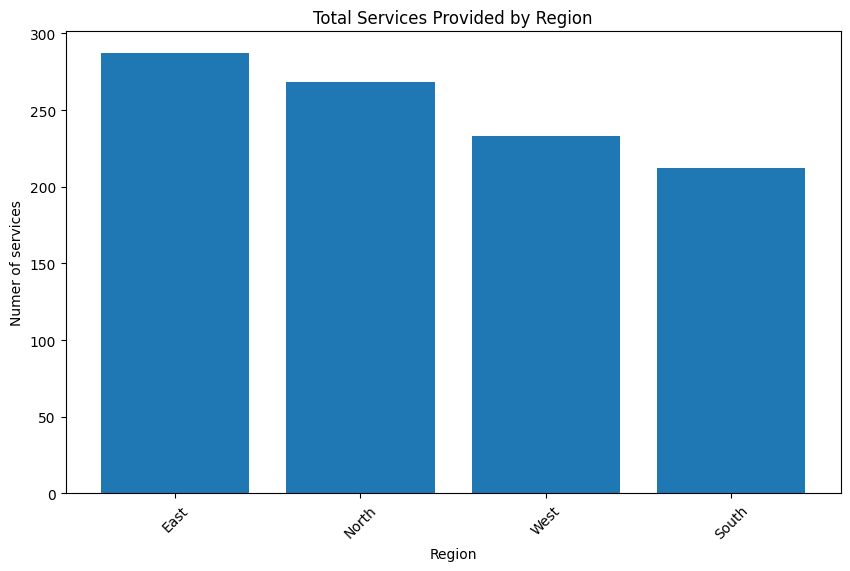

In [ ]:
plt.figure(figsize=(10,6))
plt.bar(total_services_by_region.index, total_services_by_region.values)
plt.title('Total Services Provided by Region')
plt.xlabel('Region')
plt.ylabel('Numer of services')
plt.xticks(rotation=45)
plt.savefig('total_services_by_region.png') #Save the figure
plt.show()

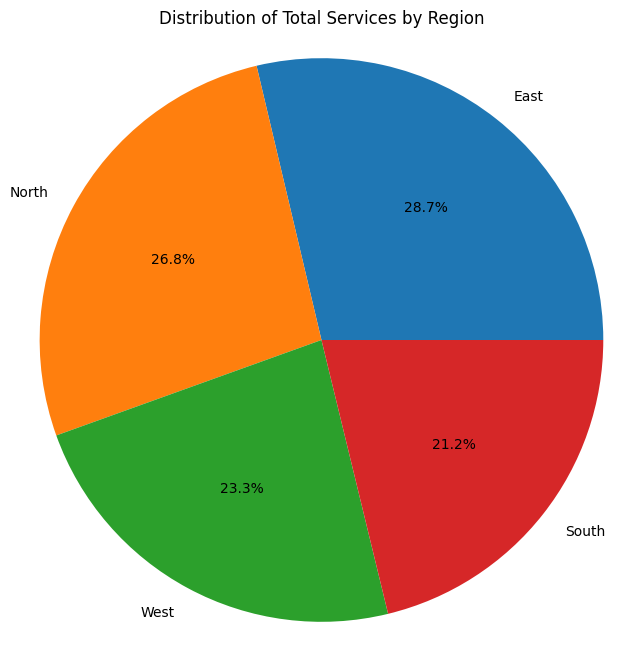

In [ ]:
#Pie chart for total services by region
plt.figure(figsize=(8,8))
plt.pie(total_services_by_region, labels=total_services_by_region.index, autopct='%1.1f%%')
plt.title('Distribution of Total Services by Region')
plt.axis('equal')  #Equal aspect ratio ensures that pie chart is circular
plt.savefig('services_disribution_by_region.png')  #Save the figure
plt.show()

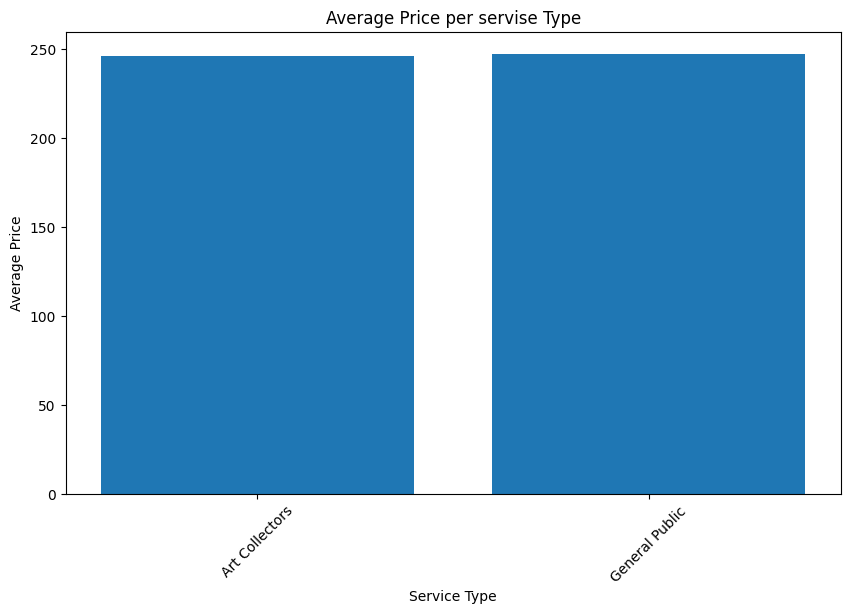

In [ ]:
#Bar plot of average price per service type
plt.figure(figsize=(10,6))
plt.bar(average_price_per_service.index, average_price_per_service.values)
plt.title('Average Price per servise Type')
plt.xlabel('Service Type')
plt.ylabel('Average Price')
plt.xticks(rotation=45)
plt.savefig('average_price_per_service.png')  #Save the figure
plt.show()

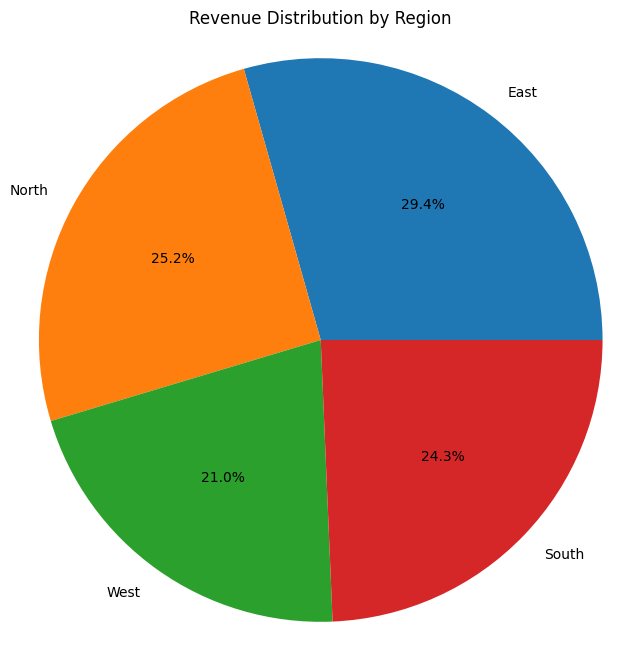

In [24]:
#Pie chart for revenue by services type
plt.figure(figsize=(8,8))
plt.pie(revenue_by_region, labels=total_services_by_region.index, autopct='%1.1f%%')
plt.title('Revenue Distribution by Region')
plt.axis('equal')  #Equal aspect ratio ensures that pie chart is circular
plt.savefig('revenue_disribution_by_region.png')  #Save the figure
plt.show()

##Save output in file

In [25]:
#Save output to a text file
with open('analysis_output.txt','w')as f:
  f.writelines(output)